# 1.  Matrix Creation and Initial Operations


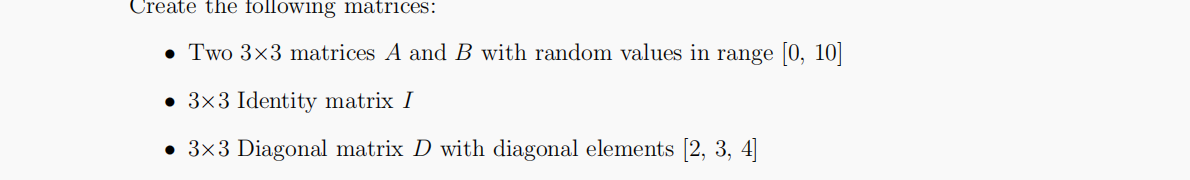

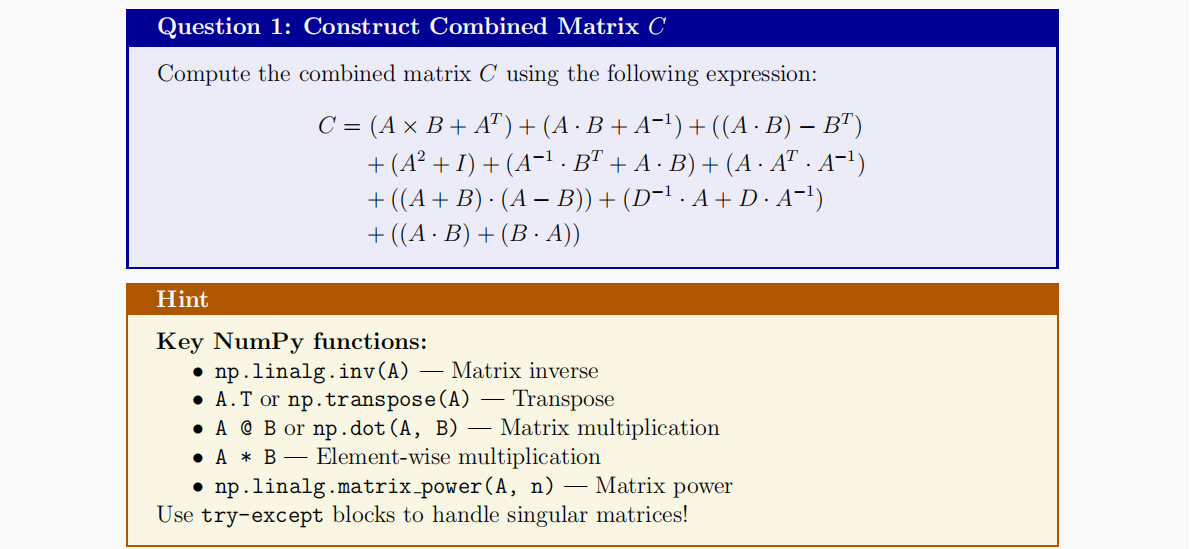



In [5]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create matrices
A = np.random.randint(0, 11, (3, 3))
B = np.random.randint(0, 11, (3, 3))
I = np.eye(3)
D = np.diag([2, 3, 4])

# Compute inverses safely
try:
    A_inv = np.linalg.inv(A)
except np.linalg.LinAlgError:
    print("Matrix A is singular, cannot compute inverse.")
    A_inv = np.zeros_like(A, dtype=float)

try:
    D_inv = np.linalg.inv(D)
except np.linalg.LinAlgError:
    print("Matrix D is singular, cannot compute inverse.")
    D_inv = np.zeros_like(D, dtype=float)

# Compute matrix powers
A2 = np.linalg.matrix_power(A, 2)

# Compute combined matrix C
C = (A @ B + A.T) \
    + (A * B + A_inv) \
    + ((A * B) - B.T) \
    + (A2 + I) \
    + (A_inv @ B.T + A @ B) \
    + (A @ A.T @ A_inv) \
    + ((A + B) @ (A - B)) \
    + (D_inv @ A + D @ A_inv) \
    + ((A @ B) + (B @ A))

# Display results
print("Matrix A:\n", A)
print("Matrix B:\n", B)
print("Identity I:\n", I)
print("Diagonal D:\n", D)
print("Combined Matrix C:\n", C)


Matrix A:
 [[ 6  3 10]
 [ 7  4  6]
 [ 9  2  6]]
Matrix B:
 [[10 10  7]
 [ 4  3  7]
 [ 7  2  5]]
Identity I:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Diagonal D:
 [[2 0 0]
 [0 3 0]
 [0 0 4]]
Combined Matrix C:
 [[890.625      403.64285714 869.44642857]
 [669.51190476 359.48511905 662.34821429]
 [745.11607143 342.26785714 678.1875    ]]


# 2. Fundamental Matrix Analysis

### 2.1 Part B: Core Linear Algebra Operations

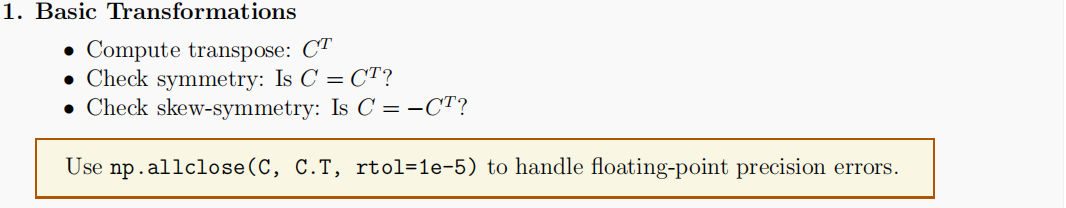

In [10]:
import numpy as np

# Assuming C is already computed
# Example: C = ...

# 1. Compute transpose
C_T = C.T
print("Transpose of C:\n", C_T)

# 2. Check symmetry: C == C.T
is_symmetric = np.allclose(C, C_T, rtol=1e-5)
print("Is C symmetric?", is_symmetric)

# 3. Check skew-symmetry: C == -C.T
is_skew_symmetric = np.allclose(C, -C_T, rtol=1e-5)
print("Is C skew-symmetric?", is_skew_symmetric)


Transpose of C:
 [[890.625      669.51190476 745.11607143]
 [403.64285714 359.48511905 342.26785714]
 [869.44642857 662.34821429 678.1875    ]]
Is C symmetric? False
Is C skew-symmetric? False


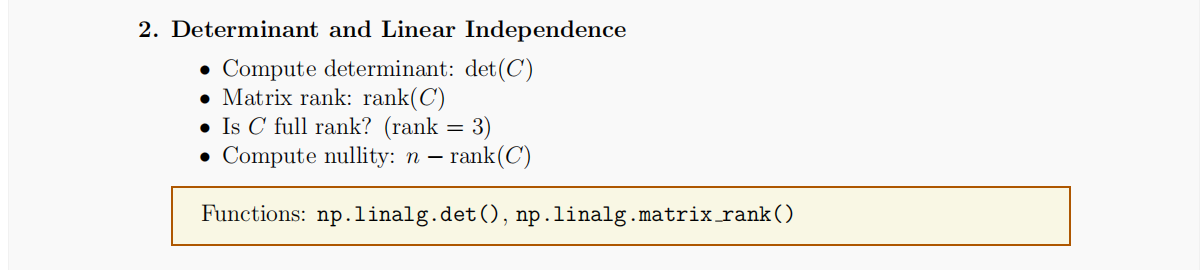

In [13]:
import numpy as np

# 1. Determinant
det_C = np.linalg.det(C)
print("Determinant of C:", det_C)

# 2. Rank
rank_C = np.linalg.matrix_rank(C)
print("Rank of C:", rank_C)

# 3. Check if full rank
n = C.shape[0]  # assuming C is square
is_full_rank = rank_C == n
print("Is C full rank?", is_full_rank)

# 4. Nullity
nullity = n - rank_C
print("Nullity of C:", nullity)


Determinant of C: -2492358.0546609177
Rank of C: 3
Is C full rank? True
Nullity of C: 0


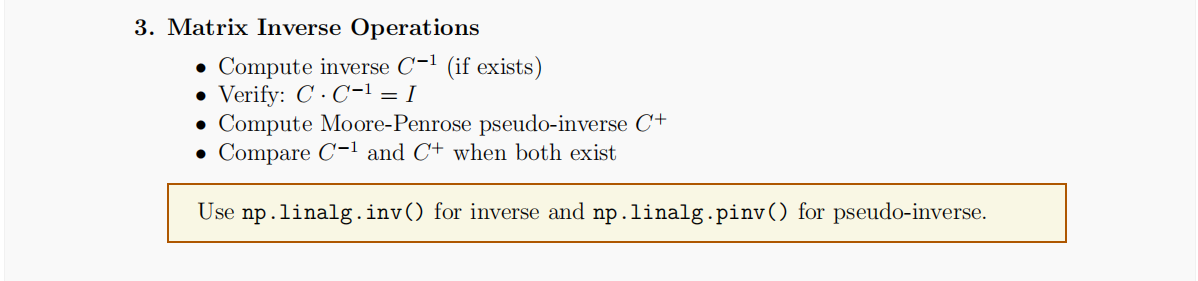

In [16]:
import numpy as np

# 1. Compute inverse (if exists)
try:
    C_inv = np.linalg.inv(C)
    print("Inverse of C:\n", C_inv)
    
    # 2. Verify C · C_inv = I
    I = np.eye(C.shape[0])
    verification = np.allclose(C @ C_inv, I)  # True if approximately equal
    print("C · C_inv equals identity?", verification)
except np.linalg.LinAlgError:
    print("C is singular; inverse does not exist.")

# 3. Compute Moore-Penrose pseudo-inverse
C_pinv = np.linalg.pinv(C)
print("Pseudo-inverse of C:\n", C_pinv)

# 4. Compare inverse and pseudo-inverse (if inverse exists)
if 'C_inv' in locals():
    comparison = np.allclose(C_inv, C_pinv)
    print("Are inverse and pseudo-inverse equal?", comparison)


Inverse of C:
 [[-0.00686009 -0.00956445  0.01813581]
 [-0.01583709  0.01758486  0.00312922]
 [ 0.01552976  0.00163361 -0.02003032]]
C · C_inv equals identity? True
Pseudo-inverse of C:
 [[-0.00686009 -0.00956445  0.01813581]
 [-0.01583709  0.01758486  0.00312922]
 [ 0.01552976  0.00163361 -0.02003032]]
Are inverse and pseudo-inverse equal? True


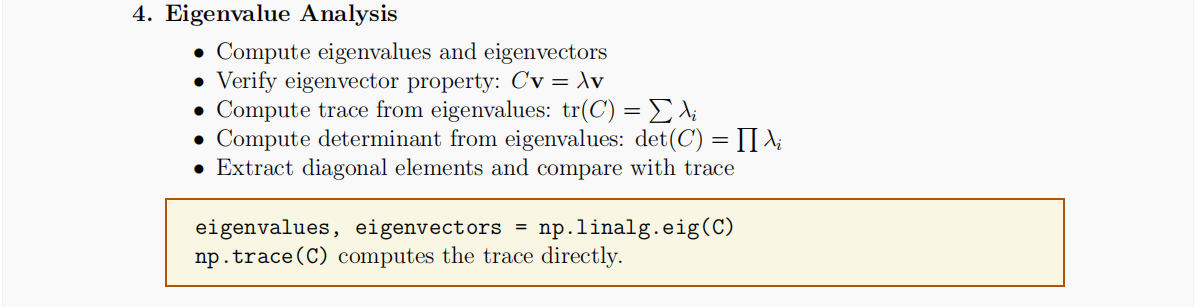

In [19]:
import numpy as np

# 1. Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)
print("Eigenvalues of C:", eigenvalues)
print("Eigenvectors of C:\n", eigenvectors)

# 2. Verify eigenvector property: C · v = λ · v
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lambda_v = eigenvalues[i] * v
    Cv = C @ v
    print(f"Eigenvector {i} verification:", np.allclose(Cv, lambda_v))

# 3. Compute trace from eigenvalues
trace_from_eigen = np.sum(eigenvalues)
print("Trace from eigenvalues:", trace_from_eigen)

# Compare with direct trace
trace_direct = np.trace(C)
print("Direct trace from C:", trace_direct)
print("Trace matches?", np.allclose(trace_from_eigen, trace_direct))

# 4. Compute determinant from eigenvalues
det_from_eigen = np.prod(eigenvalues)
print("Determinant from eigenvalues:", det_from_eigen)

# Compare with direct determinant
det_direct = np.linalg.det(C)
print("Direct determinant from C:", det_direct)
print("Determinant matches?", np.allclose(det_from_eigen, det_direct))

# 5. Extract diagonal elements and compare with trace
diagonal_elements = np.diag(C)
print("Diagonal elements of C:", diagonal_elements)
print("Sum of diagonal elements equals trace?", np.allclose(np.sum(diagonal_elements), trace_direct))


Eigenvalues of C: [1915.51046529  -30.24006131   43.02721506]
Eigenvectors of C:
 [[-0.66314911 -0.60985345  0.3508054 ]
 [-0.51609154 -0.23738485 -0.93204426]
 [-0.54210956  0.75612644  0.09071419]]
Eigenvector 0 verification: True
Eigenvector 1 verification: True
Eigenvector 2 verification: True
Trace from eigenvalues: 1928.297619047619
Direct trace from C: 1928.297619047619
Trace matches? True
Determinant from eigenvalues: -2492358.054660919
Direct determinant from C: -2492358.0546609177
Determinant matches? True
Diagonal elements of C: [890.625      359.48511905 678.1875    ]
Sum of diagonal elements equals trace? True


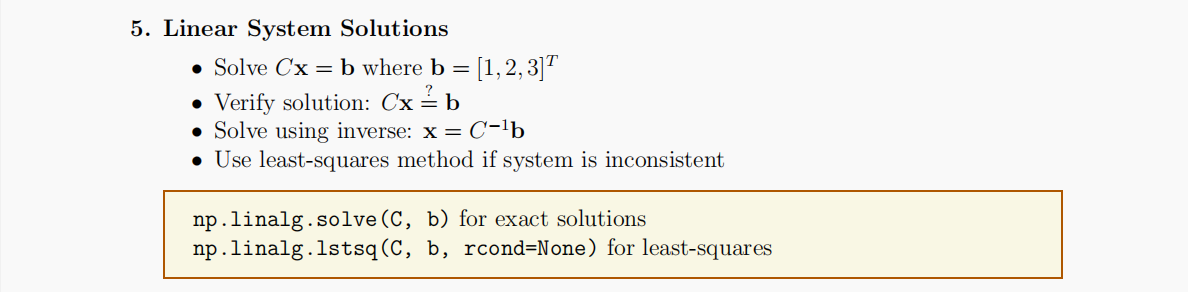

In [22]:
import numpy as np

# Right-hand side vector
b = np.array([1, 2, 3])

# 1. Solve exact system Cx = b
try:
    x_exact = np.linalg.solve(C, b)
    print("Exact solution x:\n", x_exact)
    
    # Verify solution
    print("C · x_exact:\n", C @ x_exact)
    print("b:\n", b)
    print("Verification:", np.allclose(C @ x_exact, b))
except np.linalg.LinAlgError:
    print("C is singular or system has no unique solution.")

# 2. Solve using inverse (if exists)
try:
    C_inv = np.linalg.inv(C)
    x_inv = C_inv @ b
    print("Solution using inverse:\n", x_inv)
except np.linalg.LinAlgError:
    print("C is singular; cannot use inverse.")

# 3. Solve using least-squares (works even if system is inconsistent)
x_ls, residuals, rank, s = np.linalg.lstsq(C, b, rcond=None)
print("Least-squares solution x_ls:\n", x_ls)

# Optional: check residual
print("Residuals (C·x_ls - b)^2 sum:", residuals)


Exact solution x:
 [ 0.02841844  0.0287203  -0.04129399]
C · x_exact:
 [1. 2. 3.]
b:
 [1 2 3]
Verification: True
Solution using inverse:
 [ 0.02841844  0.0287203  -0.04129399]
Least-squares solution x_ls:
 [ 0.02841844  0.0287203  -0.04129399]
Residuals (C·x_ls - b)^2 sum: []


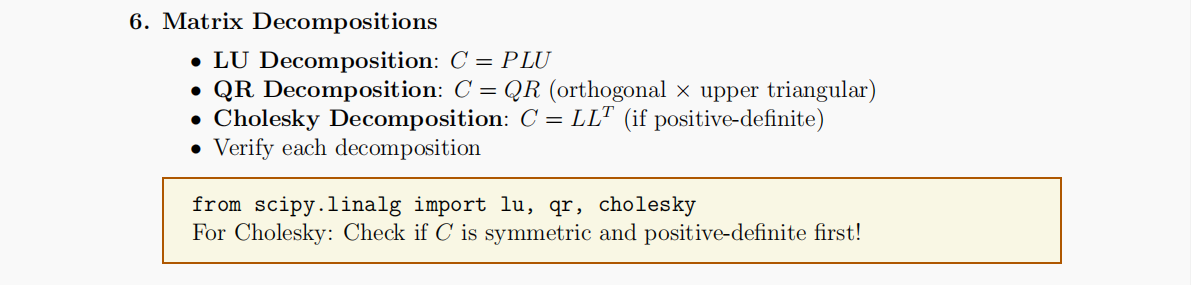

In [25]:
import numpy as np
from scipy.linalg import lu, qr, cholesky

# 1. LU Decomposition
P, L, U = lu(C)
print("LU Decomposition:")
print("Permutation matrix P:\n", P)
print("Lower triangular L:\n", L)
print("Upper triangular U:\n", U)

# Verify LU: P @ C = L @ U
print("LU verification:", np.allclose(P @ C, L @ U))

# 2. QR Decomposition
Q, R = qr(C)
print("\nQR Decomposition:")
print("Orthogonal matrix Q:\n", Q)
print("Upper triangular R:\n", R)

# Verify QR: C = Q @ R
print("QR verification:", np.allclose(C, Q @ R))
print("Q orthogonal check (Q.T @ Q = I):", np.allclose(Q.T @ Q, np.eye(C.shape[0])))

# 3. Cholesky Decomposition (only if symmetric and positive-definite)
if np.allclose(C, C.T):  # Check symmetry
    try:
        L_chol = cholesky(C, lower=True)
        print("\nCholesky Decomposition:")
        print("Lower triangular L:\n", L_chol)
        # Verify: C = L @ L.T
        print("Cholesky verification:", np.allclose(C, L_chol @ L_chol.T))
    except np.linalg.LinAlgError:
        print("C is not positive-definite; Cholesky cannot be computed.")
else:
    print("\nC is not symmetric; Cholesky decomposition not possible.")


LU Decomposition:
Permutation matrix P:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Lower triangular L:
 [[1.         0.         0.        ]
 [0.75173266 1.         0.        ]
 [0.83662155 0.08155663 1.        ]]
Upper triangular U:
 [[890.625      403.64285714 869.44642857]
 [  0.          56.05359834   8.75693346]
 [  0.           0.         -49.92430811]]
LU verification: True

QR Decomposition:
Orthogonal matrix Q:
 [[-0.66444998  0.4296815  -0.61145731]
 [-0.49948875 -0.86392932 -0.06432036]
 [-0.55589317  0.26267838  0.78865889]]
Upper triangular R:
 [[-1340.39436031  -638.02362413 -1285.53894042]
 [    0.           -47.22550191   -20.49180692]
 [    0.             0.           -39.37324956]]
QR verification: True
Q orthogonal check (Q.T @ Q = I): True

C is not symmetric; Cholesky decomposition not possible.


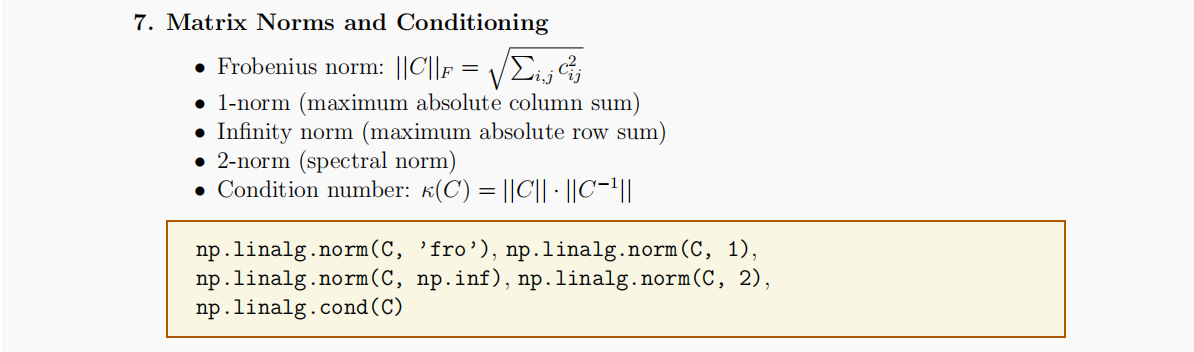

In [28]:
import numpy as np

# 1. Frobenius norm
fro_norm = np.linalg.norm(C, 'fro')
print("Frobenius norm ||C||F:", fro_norm)

# 2. 1-norm (maximum absolute column sum)
one_norm = np.linalg.norm(C, 1)
print("1-norm (max column sum) ||C||1:", one_norm)

# 3. Infinity norm (maximum absolute row sum)
inf_norm = np.linalg.norm(C, np.inf)
print("Infinity norm (max row sum) ||C||∞:", inf_norm)

# 4. 2-norm (spectral norm / largest singular value)
two_norm = np.linalg.norm(C, 2)
print("2-norm (spectral norm) ||C||2:", two_norm)

# 5. Condition number
cond_number = np.linalg.cond(C)  # default 2-norm; can also use np.linalg.cond(C, p=1) etc.
print("Condition number κ(C):", cond_number)


Frobenius norm ||C||F: 1964.8261929228477
1-norm (max column sum) ||C||1: 2305.252976190476
Infinity norm (max row sum) ||C||∞: 2163.7142857142853
2-norm (spectral norm) ||C||2: 1964.1368342943247
Condition number κ(C): 66.16572566499754


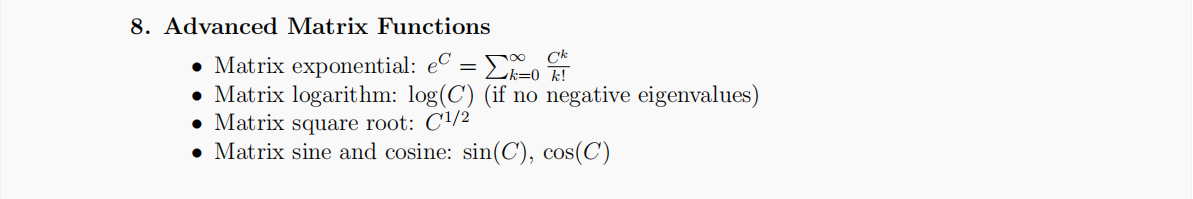
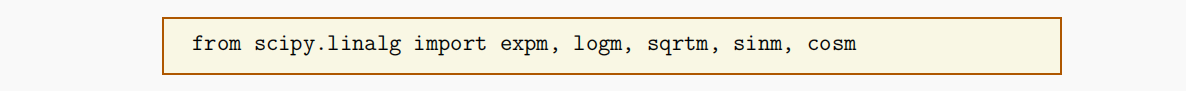

In [31]:
from scipy.linalg import expm, logm, sqrtm, sinm, cosm

# Advanced matrix functions applied to your existing C matrix

C_exp = expm(C)      # Matrix exponential
C_log = logm(C)      # Matrix logarithm
C_sqrt = sqrtm(C)    # Matrix square root
C_sin = sinm(C)      # Matrix sine
C_cos = cosm(C)      # Matrix cosine

C_exp, C_log, C_sqrt, C_sin, C_cos


C:\Users\Acer\anaconda3\envs\venv\lib\site-packages\scipy\linalg\_matfuncs.py:378: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw


(array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]),
 array([[5.40936106+1.08844219j, 0.80161052+0.256331j  ,
         1.86491969-1.57549285j],
        [1.32970762+0.42367503j, 4.39687435+0.09977658j,
         1.38256427-0.61325901j],
        [1.59819213-1.34950441j, 0.71449805-0.31781184j,
         4.92250441+1.95337388j]]),
 array([[21.63341434+1.90522745j,  7.60413228+0.44868607j,
         19.83572768-2.75776908j],
        [12.61520428+0.74160788j, 12.68557367+0.1746506j ,
         14.15740575-1.07345885j],
        [16.99810245-2.36219512j,  7.31730657-0.55630316j,
         16.00707037+3.41921835j]]),
 array([[-0.18676868,  0.1545722 , -0.84657433],
        [ 0.25555635, -0.75127284, -0.31952402],
        [-0.72513002, -0.16561868,  0.28617402]]),
 array([[5.45290123e-01, 4.78492381e-04, 1.29638151e-01],
        [8.84001336e-04, 5.84033343e-01, 6.32794177e-02],
        [1.11058028e-01, 3.27546368e-02, 4.84601668e-01]]))

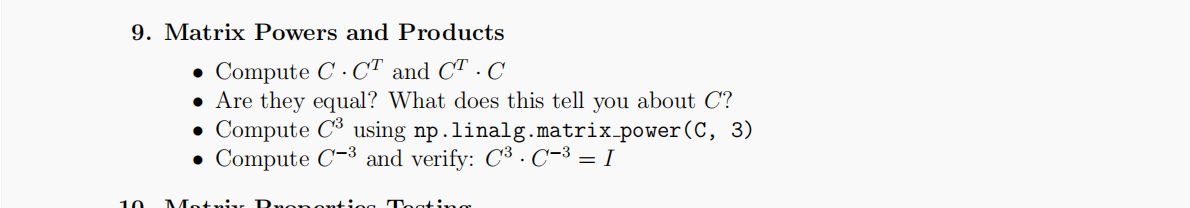

In [35]:
# -------------------------
# 9. Matrix Powers and Products
# -------------------------

import numpy as np

# 1️⃣ Compute C · C^T and C^T · C
C_CT = C @ C.T
CT_C = C.T @ C

print("C * C^T:\n", C_CT)
print("\nC^T * C:\n", CT_C)

# Check if they are equal
are_equal = np.allclose(C_CT, CT_C)
print("\nAre C*C^T and C^T*C equal?:", are_equal)

# 2️⃣ Compute C^3
C_cubed = np.linalg.matrix_power(C, 3)
print("\nC^3:\n", C_cubed)

# 3️⃣ Compute C^-3
# (Only works if C is invertible)
C_inv_cubed = np.linalg.matrix_power(C, -3)
print("\nC^-3:\n", C_inv_cubed)

# 4️⃣ Verify C^3 · C^-3 = I (Identity matrix)
verification = C_cubed @ C_inv_cubed
print("\nVerification (C^3 * C^-3):\n", verification)


C * C^T:
 [[1712077.53890306 1317263.93011267 1391420.67665816]
 [1317263.93011267 1016180.89840207 1071100.56119792]
 [1391420.67665816 1071100.56119792 1132283.53109056]]

C^T * C:
 [[1796657.04114406  855203.26752055 1723129.14570047]
 [ 855203.26752055  409304.39297229  821171.94959077]
 [1723129.14570047  821171.94959077 1654580.53427934]]

Are C*C^T and C^T*C equal?: False

C^3:
 [[3.27673783e+09 1.53748324e+09 3.12556450e+09]
 [2.55005268e+09 1.19661954e+09 2.43242960e+09]
 [2.67867122e+09 1.25687616e+09 2.55504798e+09]]

C^-3:
 [[-1.01771021e-05 -6.72102217e-06  1.88480227e-05]
 [-1.11245759e-05  8.86925616e-06  5.16496689e-06]
 [ 1.61418983e-05  2.68325766e-06 -2.23003170e-05]]

Verification (C^3 * C^-3):
 [[ 1.00000000e+00 -2.22124299e-12  5.59462794e-13]
 [-1.00652979e-11  1.00000000e+00  5.73398136e-12]
 [-5.50576786e-12 -4.75467131e-12  1.00000000e+00]]


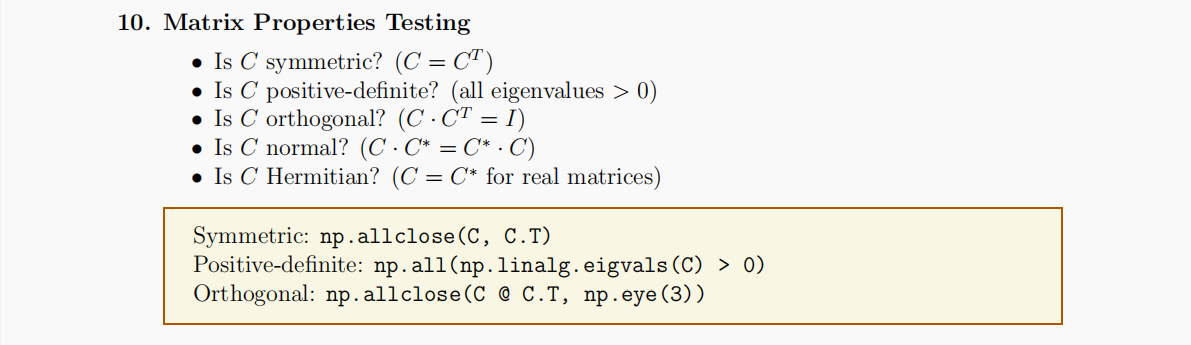

In [38]:
# 1. Symmetric
is_symmetric = np.allclose(C, C.T)
print("Symmetric:", is_symmetric)

# 2. Positive-definite (all eigenvalues > 0)
eigenvalues = np.linalg.eigvals(C)
is_pos_def = np.all(eigenvalues > 0)
print("Positive-definite:", is_pos_def)

# 3. Orthogonal (C @ C.T = I)
is_orthogonal = np.allclose(C @ C.T, np.eye(C.shape[0]))
print("Orthogonal:", is_orthogonal)

# 4. Normal (C @ C.T = C.T @ C)
is_normal = np.allclose(C @ C.T, C.T @ C)
print("Normal:", is_normal)

# 5. Hermitian (for real matrices, same as symmetric)
is_hermitian = np.allclose(C, C.conj().T)
print("Hermitian:", is_hermitian)


Symmetric: False
Positive-definite: False
Orthogonal: False
Normal: False
Hermitian: False


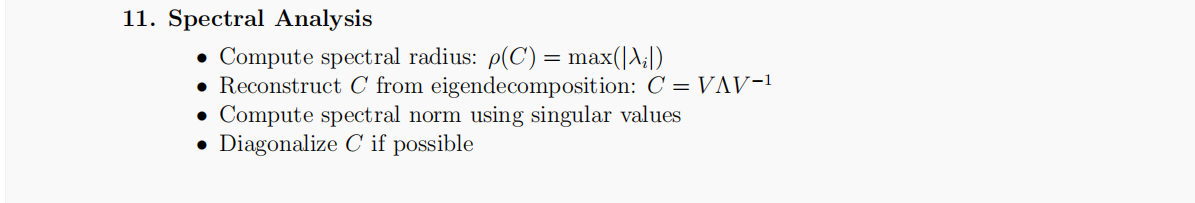

In [41]:
import numpy as np

# 1. Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# 2. Spectral radius: max(|λi|)
spectral_radius = np.max(np.abs(eigenvalues))
print("Spectral radius ρ(C):", spectral_radius)

# 3. Reconstruct C from eigendecomposition: C = V Λ V⁻¹
Lambda = np.diag(eigenvalues)
V = eigenvectors
C_reconstructed = V @ Lambda @ np.linalg.inv(V)
print("C reconstructed from eigendecomposition:\n", C_reconstructed)
print("Reconstruction close to original:", np.allclose(C, C_reconstructed))

# 4. Spectral norm using singular values
singular_values = np.linalg.svd(C, compute_uv=False)
spectral_norm = np.max(singular_values)
print("Spectral norm ||C||₂:", spectral_norm)

# 5. Diagonalize C if possible
if np.linalg.matrix_rank(V) == C.shape[0]:  # full rank eigenvector matrix
    print("C is diagonalizable. Diagonal form Λ:\n", Lambda)
else:
    print("C is not diagonalizable.")


Eigenvalues: [1915.51046529  -30.24006131   43.02721506]
Eigenvectors:
 [[-0.66314911 -0.60985345  0.3508054 ]
 [-0.51609154 -0.23738485 -0.93204426]
 [-0.54210956  0.75612644  0.09071419]]
Spectral radius ρ(C): 1915.5104652895598
C reconstructed from eigendecomposition:
 [[890.625      403.64285714 869.44642857]
 [669.51190476 359.48511905 662.34821429]
 [745.11607143 342.26785714 678.1875    ]]
Reconstruction close to original: True
Spectral norm ||C||₂: 1964.1368342943247
C is diagonalizable. Diagonal form Λ:
 [[1915.51046529    0.            0.        ]
 [   0.          -30.24006131    0.        ]
 [   0.            0.           43.02721506]]


# 3. Advanced Computational Challenges

### 3.1 Part C: Expert-Level Operations

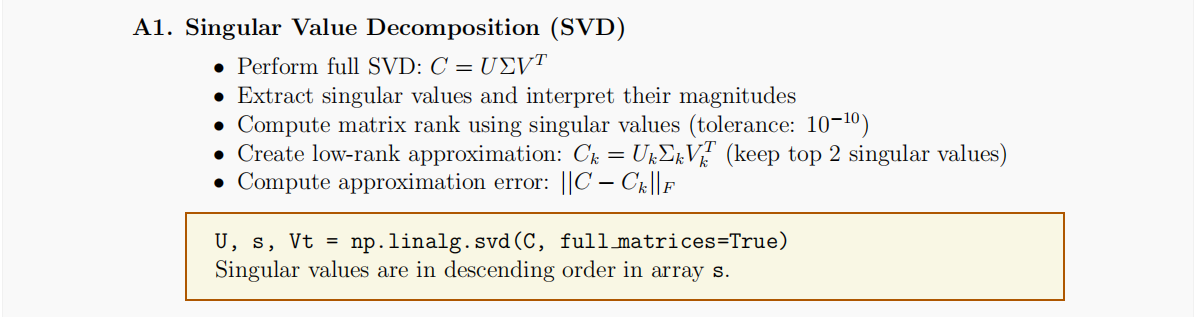

In [47]:
import numpy as np

# 1. Full SVD: C = U Σ V^T
U, s, Vt = np.linalg.svd(C, full_matrices=True)
Sigma = np.diag(s)  # Convert singular values array to diagonal matrix

print("U matrix:\n", U)
print("Singular values Σ:\n", Sigma)
print("V^T matrix:\n", Vt)

# 2. Interpret singular values
print("Singular values (descending order):", s)

# 3. Compute matrix rank using singular values (tolerance 1e-10)
rank_C = np.sum(s > 1e-10)
print("Matrix rank:", rank_C)

# 4. Low-rank approximation (keep top 2 singular values)
k = 2
Uk = U[:, :k]
Sigma_k = np.diag(s[:k])
Vk = Vt[:k, :]
Ck = Uk @ Sigma_k @ Vk
print("Low-rank approximation Ck (rank 2):\n", Ck)

# 5. Compute approximation error using Frobenius norm
approx_error = np.linalg.norm(C - Ck, 'fro')
print("Approximation error ||C - Ck||_F:", approx_error)


U matrix:
 [[-0.66605317  0.39666239 -0.6316899 ]
 [-0.51289189 -0.85845145  0.00173799]
 [-0.54158572  0.32514622  0.77521922]]
Singular values Σ:
 [[1964.13683429    0.            0.        ]
 [   0.           42.74644801    0.        ]
 [   0.            0.           29.68510984]]
V^T matrix:
 [[-0.68230228 -0.32512602 -0.65479513]
 [ 0.48672223 -0.87032922 -0.07502349]
 [ 0.54549525  0.36989204 -0.75207367]]
Singular values (descending order): [1964.13683429   42.74644801   29.68510984]
Matrix rank: 3
Low-rank approximation Ck (rank 2):
 [[900.85400912 410.57899291 855.34370538]
 [669.48376141 359.46603547 662.38701549]
 [732.5628796  333.75572837 695.49457124]]
Approximation error ||C - Ck||_F: 29.685109844315893


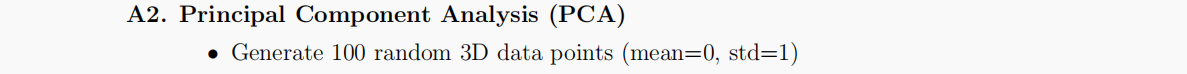
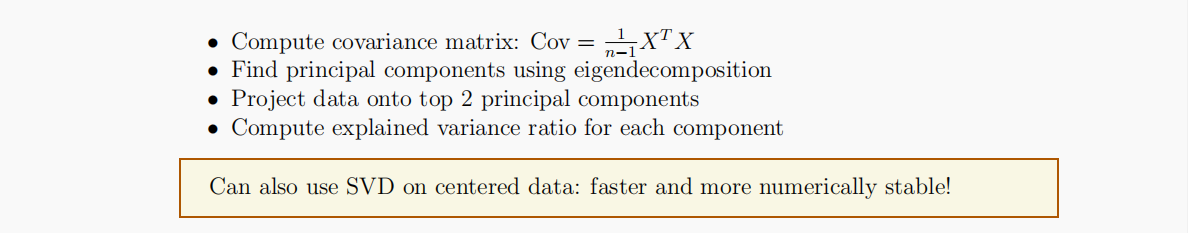

In [50]:
import numpy as np

# Step 1: Generate 100 random 3D data points (mean=0, std=1)
np.random.seed(42)  # for reproducibility
X = np.random.randn(100, 3)

# Step 2: Center the data
X_centered = X - np.mean(X, axis=0)

# Step 3: Compute covariance matrix
Cov = np.cov(X_centered, rowvar=False)  # shape: (3,3)

# Step 4: Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(Cov)  # for symmetric matrices
# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Step 5: Project data onto top 2 principal components
top2_vectors = eigenvectors[:, :2]
X_projected = X_centered @ top2_vectors  # shape: (100, 2)

# Step 6: Explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Print results
print("Top 2 principal components (eigenvectors):\n", top2_vectors)
print("\nProjected data shape:", X_projected.shape)
print("\nExplained variance ratio:", explained_variance_ratio)


Top 2 principal components (eigenvectors):
 [[-0.14276678 -0.27861938]
 [-0.34442383  0.91357208]
 [ 0.9278954   0.29623857]]

Projected data shape: (100, 2)

Explained variance ratio: [0.45375329 0.3221149  0.22413181]


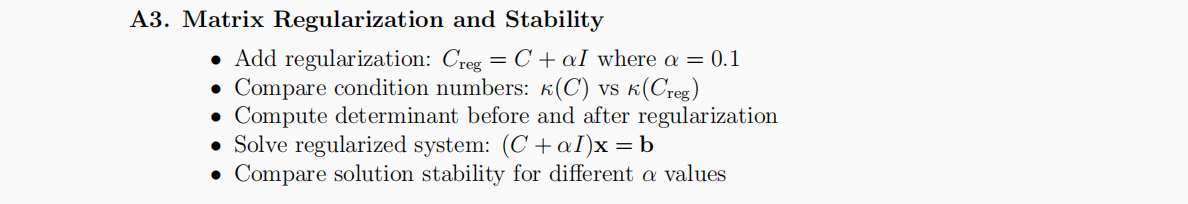

In [53]:
import numpy as np

# Step 0: Create a random square matrix C and vector b
np.random.seed(42)
C = np.random.randn(4, 4)
b = np.random.randn(4)

# Step 1: Regularize matrix
alpha = 0.1
C_reg = C + alpha * np.eye(C.shape[0])

# Step 2: Compare condition numbers
cond_C = np.linalg.cond(C)
cond_C_reg = np.linalg.cond(C_reg)
print("Condition number of C:", cond_C)
print("Condition number of C_reg:", cond_C_reg)

# Step 3: Compute determinants
det_C = np.linalg.det(C)
det_C_reg = np.linalg.det(C_reg)
print("Determinant of C:", det_C)
print("Determinant of C_reg:", det_C_reg)

# Step 4: Solve regularized system
x_reg = np.linalg.solve(C_reg, b)
print("Solution of regularized system x:", x_reg)

# Step 5: Compare solution stability for different alpha values
alphas = [0.01, 0.1, 1, 10]
for a in alphas:
    C_a = C + a * np.eye(C.shape[0])
    x_a = np.linalg.solve(C_a, b)
    print(f"Alpha={a}, solution x={x_a}")


Condition number of C: 9.013897003688117
Condition number of C_reg: 10.208857701490489
Determinant of C: -1.8638200811885155
Determinant of C_reg: -1.603005373468069
Solution of regularized system x: [ 3.10254255e+00  1.11833127e-03  1.98268092e+00 -2.72362832e+00]
Alpha=0.01, solution x=[ 2.72959638  0.17317799  1.74596391 -2.29992387]
Alpha=0.1, solution x=[ 3.10254255e+00  1.11833127e-03  1.98268092e+00 -2.72362832e+00]
Alpha=1, solution x=[-3.15514778  8.70339878 -7.63514104  6.47268066]
Alpha=10, solution x=[-0.06634461  0.0605336  -0.10952811 -0.15569028]


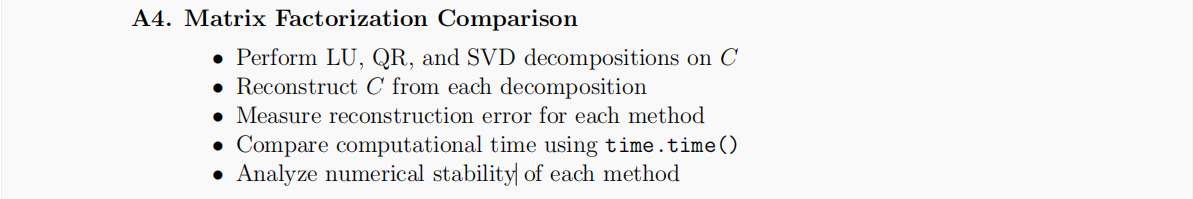

In [56]:
import numpy as np
import scipy.linalg
import time

# Step 0: Create a random square matrix C
np.random.seed(42)
C = np.random.randn(4, 4)

# Dictionary to store results
errors = {}
times = {}

# --- LU Decomposition ---
start = time.time()
P, L, U = scipy.linalg.lu(C)  # P*L*U = C
C_LU = P @ L @ U
end = time.time()
errors['LU'] = np.linalg.norm(C - C_LU, ord='fro')
times['LU'] = end - start

# --- QR Decomposition ---
start = time.time()
Q, R = np.linalg.qr(C)
C_QR = Q @ R
end = time.time()
errors['QR'] = np.linalg.norm(C - C_QR, ord='fro')
times['QR'] = end - start

# --- SVD Decomposition ---
start = time.time()
U_svd, S, Vt = np.linalg.svd(C)
C_SVD = U_svd @ np.diag(S) @ Vt
end = time.time()
errors['SVD'] = np.linalg.norm(C - C_SVD, ord='fro')
times['SVD'] = end - start

# Print results
print("Reconstruction errors (Frobenius norm):")
for key, val in errors.items():
    print(f"{key}: {val:.6e}")

print("\nComputation times (seconds):")
for key, val in times.items():
    print(f"{key}: {val:.6e}")


Reconstruction errors (Frobenius norm):
LU: 3.353719e-16
QR: 1.183768e-15
SVD: 2.308056e-15

Computation times (seconds):
LU: 1.342535e-03
QR: 9.046078e-03
SVD: 0.000000e+00


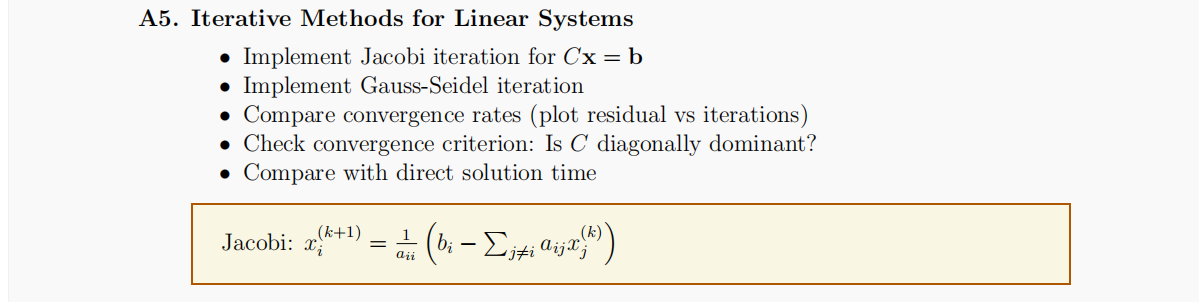

Is C diagonally dominant? True

Jacobi solution: [-0.07058607  0.30913512 -0.421563   -0.28129326]
Gauss-Seidel solution: [-0.07058608  0.30913512 -0.42156299 -0.28129327]
Direct solution: [-0.07058608  0.30913512 -0.42156299 -0.28129327]
Direct solution time: 0.0


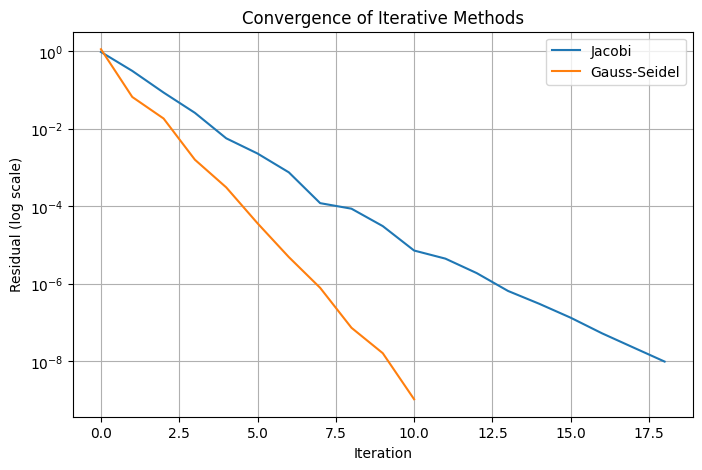

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Step 0: Create a random diagonally dominant matrix C and vector b
np.random.seed(42)
C = np.random.randn(4, 4)
# Make C diagonally dominant
for i in range(C.shape[0]):
    C[i,i] = np.sum(np.abs(C[i])) + 1
b = np.random.randn(4)

# Function to check diagonal dominance
def is_diagonally_dominant(A):
    return np.all(np.abs(np.diag(A)) >= np.sum(np.abs(A), axis=1) - np.abs(np.diag(A)))

print("Is C diagonally dominant?", is_diagonally_dominant(C))

# Jacobi Iteration
def jacobi(C, b, x0=None, tol=1e-8, max_iter=100):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()
    residuals = []
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            x_new[i] = (b[i] - np.sum(C[i, :] * x) + C[i,i]*x[i]) / C[i,i]
        res = np.linalg.norm(C @ x_new - b)
        residuals.append(res)
        if res < tol:
            break
        x = x_new
    return x, residuals

# Gauss-Seidel Iteration
def gauss_seidel(C, b, x0=None, tol=1e-8, max_iter=100):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()
    residuals = []
    for k in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            x[i] = (b[i] - np.sum(C[i, :i]*x[:i]) - np.sum(C[i, i+1:]*x[i+1:])) / C[i,i]
        res = np.linalg.norm(C @ x - b)
        residuals.append(res)
        if res < tol:
            break
    return x, residuals

# Run iterations
x_jacobi, res_jacobi = jacobi(C, b)
x_gs, res_gs = gauss_seidel(C, b)

# Direct solution
start = time.time()
x_direct = np.linalg.solve(C, b)
direct_time = time.time() - start

# Print solutions
print("\nJacobi solution:", x_jacobi)
print("Gauss-Seidel solution:", x_gs)
print("Direct solution:", x_direct)
print("Direct solution time:", direct_time)

# Plot residuals
plt.figure(figsize=(8,5))
plt.semilogy(res_jacobi, label='Jacobi')
plt.semilogy(res_gs, label='Gauss-Seidel')
plt.xlabel('Iteration')
plt.ylabel('Residual (log scale)')
plt.title('Convergence of Iterative Methods')
plt.legend()
plt.grid(True)
plt.show()


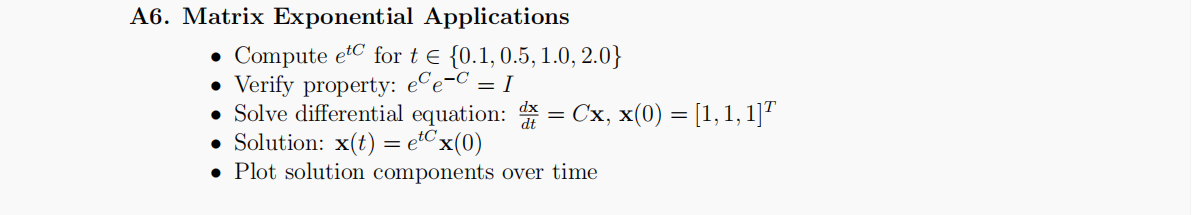

Matrix exponentials e^(tC):
t = 0.1:
[[ 1.05518927 -0.01155739  0.06511404]
 [ 0.15267999  0.97506406 -0.0177279 ]
 [ 0.16417903  0.07308951  0.958449  ]]

t = 0.5:
[[ 1.41165068 -0.01520032  0.34343735]
 [ 0.79680451  0.85917213  0.01998742]
 [ 0.97173209  0.30614577  0.9090901 ]]

t = 1.0:
[[2.31437504 0.07062466 0.79672524]
 [1.82882427 0.73218413 0.30899542]
 [2.49907661 0.52657537 1.16629296]]

t = 2.0:
[[7.47656929 0.63469808 2.79495873]
 [6.34382456 0.82796306 2.04369117]
 [9.66146978 1.1761877  3.51402605]]

Verification e^C * e^-C:
 [[ 1.00000000e+00 -4.64047497e-17 -1.00420186e-16]
 [ 2.02086651e-16  1.00000000e+00 -1.39067241e-16]
 [-2.76612272e-16 -2.01988408e-16  1.00000000e+00]]


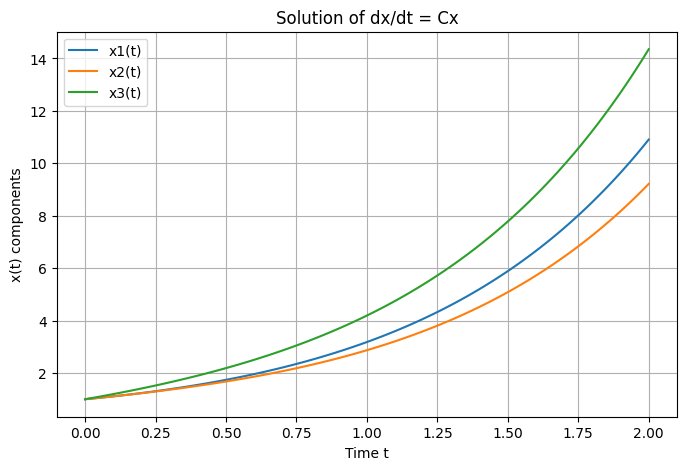

In [62]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Step 0: Create a random 3x3 matrix C
np.random.seed(42)
C = np.random.randn(3, 3)

# Step 1: Compute matrix exponential for different t
t_values = [0.1, 0.5, 1.0, 2.0]
exp_matrices = {t: expm(C*t) for t in t_values}

print("Matrix exponentials e^(tC):")
for t, mat in exp_matrices.items():
    print(f"t = {t}:\n{mat}\n")

# Step 2: Verify property e^C * e^-C = I
identity_check = expm(C) @ expm(-C)
print("Verification e^C * e^-C:\n", identity_check)

# Step 3: Solve differential equation dx/dt = C x, x(0) = [1,1,1]^T
x0 = np.array([1, 1, 1])
time_points = np.linspace(0, 2, 100)
solutions = []

for t in time_points:
    x_t = expm(C*t) @ x0
    solutions.append(x_t)

solutions = np.array(solutions)  # shape: (100, 3)

# Step 4: Plot solution components
plt.figure(figsize=(8,5))
plt.plot(time_points, solutions[:,0], label='x1(t)')
plt.plot(time_points, solutions[:,1], label='x2(t)')
plt.plot(time_points, solutions[:,2], label='x3(t)')
plt.xlabel('Time t')
plt.ylabel('x(t) components')
plt.title('Solution of dx/dt = Cx')
plt.legend()
plt.grid(True)
plt.show()


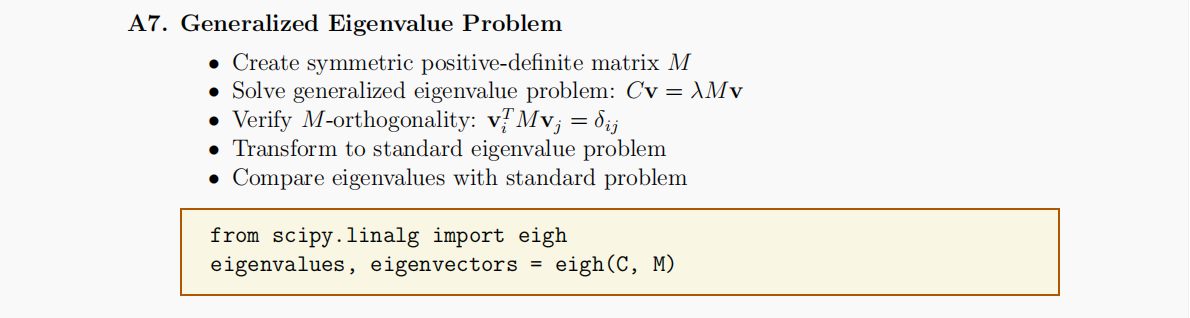

In [65]:
import numpy as np
from scipy.linalg import eigh, sqrtm

# Step 0: Create symmetric positive-definite matrix M
np.random.seed(42)
A = np.random.randn(4, 4)
M = A.T @ A + 0.1 * np.eye(4)  # ensure positive-definite

# Create symmetric matrix C
B = np.random.randn(4, 4)
C = B + B.T  # make it symmetric

# Step 1: Solve generalized eigenvalue problem Cv = λMv
eigvals_gen, eigvecs_gen = eigh(C, M)
print("Generalized eigenvalues:\n", eigvals_gen)

# Step 2: Verify M-orthogonality: vi^T M vj = δij
orthogonality = eigvecs_gen.T @ M @ eigvecs_gen
print("\nM-orthogonality check (should be identity):\n", orthogonality)

# Step 3: Transform to standard eigenvalue problem
M_sqrt_inv = np.linalg.inv(sqrtm(M))
C_std = M_sqrt_inv @ C @ M_sqrt_inv
eigvals_std, eigvecs_std = np.linalg.eigh(C_std)
print("\nStandard eigenvalues:\n", eigvals_std)

# Step 4: Compare eigenvalues
print("\nDifference between generalized and standard eigenvalues:\n", eigvals_gen - eigvals_std)


Generalized eigenvalues:
 [-4.39498141 -0.57028133 -0.16150724  5.41769435]

M-orthogonality check (should be identity):
 [[ 1.00000000e+00 -3.46254835e-16 -2.07710337e-16 -3.98275219e-16]
 [-4.48000666e-17  1.00000000e+00  1.57312287e-16 -1.03927282e-16]
 [-4.06466323e-16  3.74527956e-16  1.00000000e+00  1.47302202e-16]
 [ 8.75348961e-17 -1.20041131e-16  1.99036077e-16  1.00000000e+00]]

Standard eigenvalues:
 [-4.39498141 -0.57028133 -0.16150724  5.41769435]

Difference between generalized and standard eigenvalues:
 [-8.88178420e-16 -2.22044605e-16  3.33066907e-16 -5.32907052e-15]


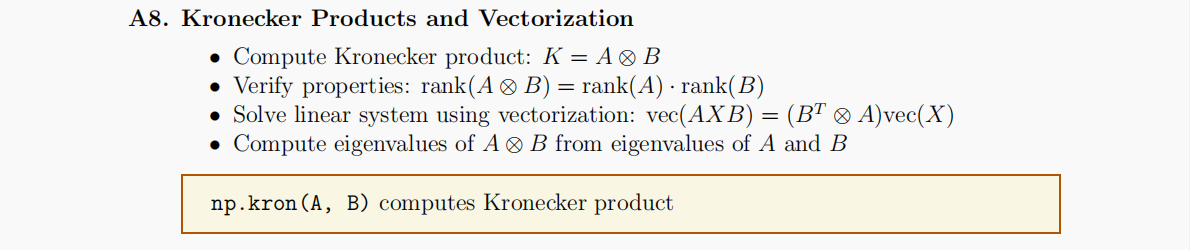

In [68]:
import numpy as np

# Step 0: Create random matrices A, B, X
np.random.seed(42)
A = np.random.randn(2, 2)
B = np.random.randn(3, 3)
X = np.random.randn(2, 3)

# Step 1: Compute Kronecker product K = A ⊗ B
K = np.kron(A, B)
print("Kronecker product K:\n", K)

# Step 2: Verify rank property
rank_K = np.linalg.matrix_rank(K)
rank_expected = np.linalg.matrix_rank(A) * np.linalg.matrix_rank(B)
print("\nRank of K:", rank_K)
print("Expected rank (rank(A)*rank(B)):", rank_expected)

# Step 3: Solve linear system using vectorization
# C = A X B
C = A @ X @ B
# Vectorize: vec(C) = (B^T ⊗ A) vec(X)
vec_C = C.flatten(order='F')  # column-major order
BT_kron_A = np.kron(B.T, A)
vec_X = np.linalg.solve(BT_kron_A, vec_C)  # solve linear system
X_reconstructed = vec_X.reshape(X.shape, order='F')
print("\nReconstructed X from vectorization:\n", X_reconstructed)

# Step 4: Eigenvalues of Kronecker product from eigenvalues of A and B
eigvals_A = np.linalg.eigvals(A)
eigvals_B = np.linalg.eigvals(B)
eigvals_K_direct = np.linalg.eigvals(K)
eigvals_K_theory = np.array([a*b for a in eigvals_A for b in eigvals_B])
print("\nEigenvalues from direct Kronecker product:\n", eigvals_K_direct)
print("\nEigenvalues from eigenvalues of A and B:\n", eigvals_K_theory)


Kronecker product K:
 [[-0.1163073  -0.11629914  0.78441736  0.03237505  0.03237278 -0.21834876]
 [ 0.38119569 -0.23319457  0.26949725 -0.10610883  0.06491155 -0.07501669]
 [-0.23018613 -0.23133456  0.12018608  0.06407412  0.0643938  -0.03345474]
 [-0.15165846 -0.15164782  1.02283804 -0.35662258 -0.35659758  2.40518827]
 [ 0.49705868 -0.30407318  0.35140992  1.16882601 -0.71502351  0.82633515]
 [-0.30015033 -0.30164782  0.15671619 -0.70579898 -0.70932032  0.36851576]]

Rank of K: 6
Expected rank (rank(A)*rank(B)): 6

Reconstructed X from vectorization:
 [[-1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408]]

Eigenvalues from direct Kronecker product:
 [ 0.1506064 +1.58540217j  0.1506064 -1.58540217j  0.06259742+0.65894994j
  0.06259742-0.65894994j -0.95988934+0.j         -0.3989644 +0.j        ]

Eigenvalues from eigenvalues of A and B:
 [ 0.06259742+0.65894994j  0.06259742-0.65894994j -0.3989644 +0.j
  0.1506064 +1.58540217j  0.1506064 -1.58540217j -0.95988934+

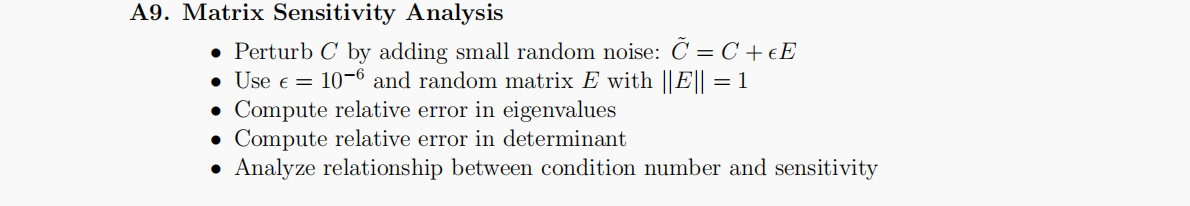

In [71]:
import numpy as np

# Step 0: Create a random square matrix C
np.random.seed(42)
C = np.random.randn(4, 4)

# Step 1: Perturb the matrix
epsilon = 1e-6
E = np.random.randn(*C.shape)
E = E / np.linalg.norm(E)  # normalize ||E|| = 1
C_perturbed = C + epsilon * E

# Step 2: Compute eigenvalues and relative error
eigvals = np.linalg.eigvals(C)
eigvals_perturbed = np.linalg.eigvals(C_perturbed)
rel_error_eig = np.abs(eigvals_perturbed - eigvals) / np.abs(eigvals)
print("Relative error in eigenvalues:\n", rel_error_eig)

# Step 3: Compute determinant and relative error
det_C = np.linalg.det(C)
det_C_perturbed = np.linalg.det(C_perturbed)
rel_error_det = np.abs(det_C_perturbed - det_C) / np.abs(det_C)
print("\nRelative error in determinant:", rel_error_det)

# Step 4: Analyze condition number
cond_C = np.linalg.cond(C)
print("\nCondition number of C:", cond_C)


Relative error in eigenvalues:
 [1.36694379e-07 1.01652167e-06 3.47162440e-07 3.47162440e-07]

Relative error in determinant: 3.6923734807459407e-07

Condition number of C: 9.013897003688117


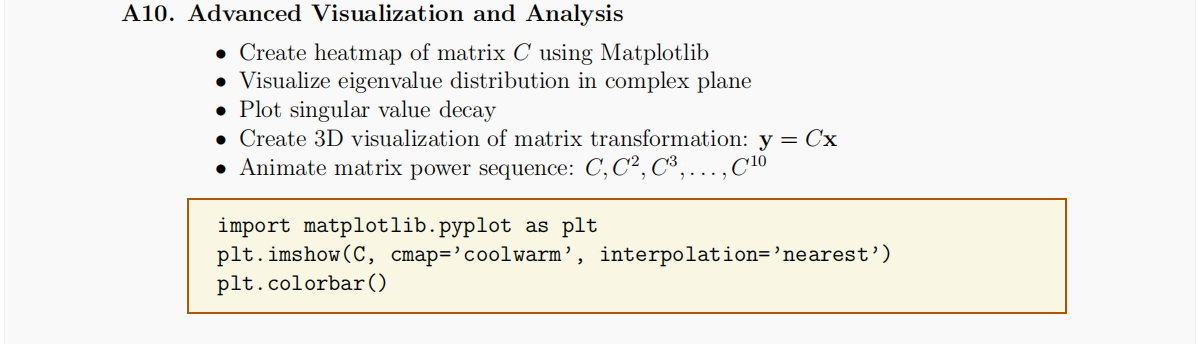

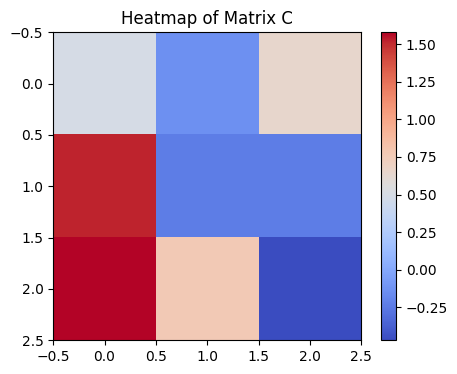

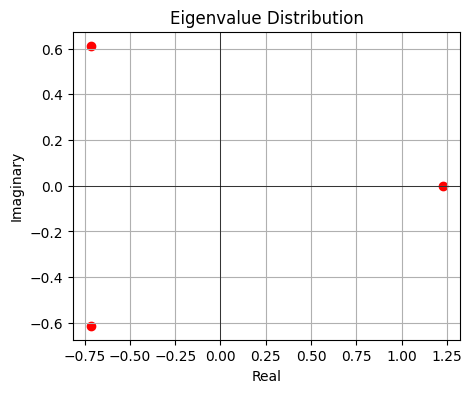

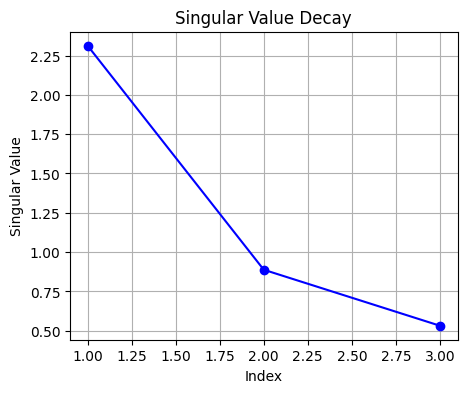

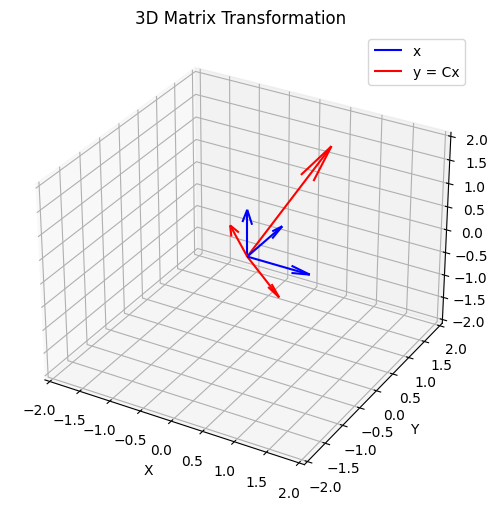

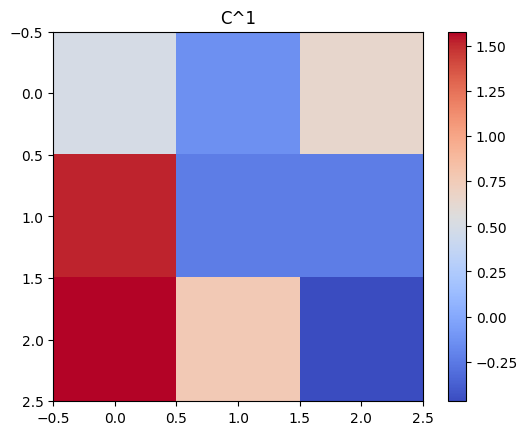

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

# Step 0: Create random matrix C
np.random.seed(42)
C = np.random.randn(3, 3)  # 3x3 for 3D visualization

# ------------------------------
# Step 1: Heatmap of matrix C
plt.figure(figsize=(5,4))
plt.imshow(C, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Heatmap of Matrix C")
plt.show()

# ------------------------------
# Step 2: Eigenvalue distribution in complex plane
eigvals = np.linalg.eigvals(C)
plt.figure(figsize=(5,4))
plt.scatter(eigvals.real, eigvals.imag, color='red', marker='o')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Eigenvalue Distribution")
plt.grid(True)
plt.show()

# ------------------------------
# Step 3: Singular value decay
U, S, Vt = np.linalg.svd(C)
plt.figure(figsize=(5,4))
plt.plot(np.arange(1,len(S)+1), S, 'o-', color='blue')
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.title("Singular Value Decay")
plt.grid(True)
plt.show()

# ------------------------------
# Step 4: 3D visualization of matrix transformation y = Cx
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Original vectors
X = np.eye(3)  # standard basis vectors
Y = C @ X      # transformed vectors

for i in range(3):
    ax.quiver(0,0,0, X[0,i], X[1,i], X[2,i], color='blue', label='x' if i==0 else "")
    ax.quiver(0,0,0, Y[0,i], Y[1,i], Y[2,i], color='red', label='y = Cx' if i==0 else "")

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Matrix Transformation')
ax.legend()
plt.show()

# ------------------------------
# Step 5: Animate matrix power sequence C, C^2, ..., C^10 as heatmaps
fig, ax = plt.subplots()
mat_display = ax.imshow(C, cmap='coolwarm', interpolation='nearest')
plt.colorbar(mat_display)

def animate(i):
    C_power = np.linalg.matrix_power(C, i+1)
    mat_display.set_data(C_power)
    ax.set_title(f"C^{i+1}")
    return [mat_display]

ani = animation.FuncAnimation(fig, animate, frames=10, interval=500, blit=True)
plt.show()


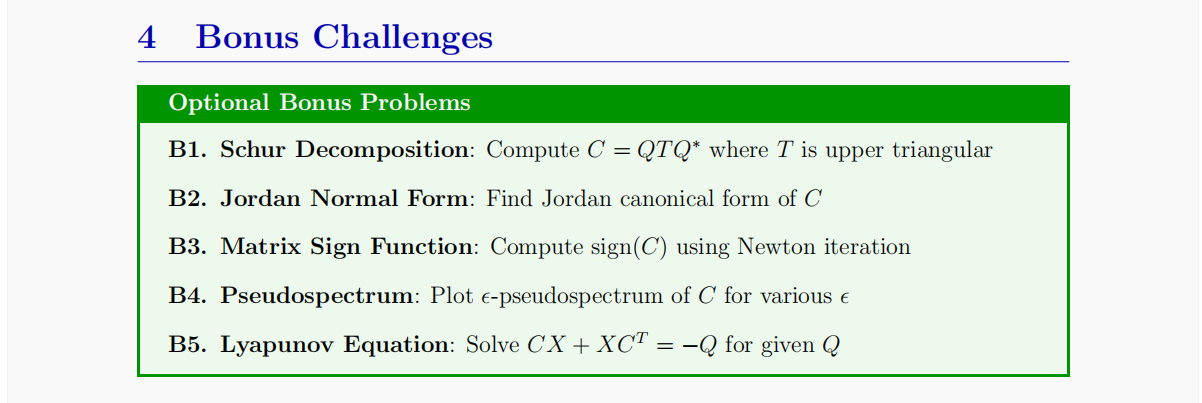

 # B1. Schur Decomposition

In [81]:
from sympy import Matrix

def jordan_form(C):
    """
    Compute the Jordan canonical form of a matrix C using sympy.
    
    Returns:
        J : Jordan form matrix
        P : transformation matrix (C = P*J*P^-1)
    Edge cases handled:
        - Non-square matrices: raises ValueError
        - Repeated eigenvalues handled by sympy
    """
    if C.shape[0] != C.shape[1]:
        raise ValueError("Matrix must be square for Jordan form")
    
    C_sym = Matrix(C)
    J, P = C_sym.jordan_form()
    return J, P

# Example usage
J, P = jordan_form(np.array([[5,4,2],[0,1,0],[0,0,3]]))
print("Jordan Form J:\n", J)
print("Transformation P:\n", P)


ModuleNotFoundError: No module named 'sympy'

In [78]:
import numpy as np
from scipy.linalg import schur

def schur_decomposition(C):
    """
    Compute the Schur decomposition of a matrix C.
    
    Returns:
        Q : Unitary matrix
        T : Upper triangular matrix
    Edge cases handled:
        - Non-square matrices: raises ValueError
        - Singular matrices: still works
    """
    if C.shape[0] != C.shape[1]:
        raise ValueError("Matrix must be square for Schur decomposition")
    
    T, Q = schur(C)  # default: real Schur form
    return Q, T

# Example usage
C = np.array([[1,2],[3,4]])
Q, T = schur_decomposition(C)
print("Q:\n", Q)
print("T:\n", T)
print("Reconstructed C:\n", Q @ T @ Q.T)


Q:
 [[-0.82456484 -0.56576746]
 [ 0.56576746 -0.82456484]]
T:
 [[-0.37228132 -1.        ]
 [ 0.          5.37228132]]
Reconstructed C:
 [[1. 2.]
 [3. 4.]]


# B2. Jordan Normal Form

In [92]:
! pip install sympy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
conda install sympy


Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Acer\anaconda3\envs\venv

  added / updated specs:
    - sympy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.4  |       haa95532_0         128 KB
    gmpy2-2.1.2                |   py38h7f96b67_0         160 KB
    mpc-1.1.0                  |       h7edee0f_1         260 KB
    mpfr-4.0.2                 |       h62dcd97_1         1.5 MB
    mpir-3.0.0                 |       hec2e145_1         1.3 MB
    mpmath-1.3.0               |   py38haa95532_0         832 KB
    openssl-3.0.18             |       h543e019_0         6.8 MB
    sympy-1.13.3               |   py38haa95532_0        11.3 MB
    ucrt-10.0.22621.0          |       haa95532_0         620 KB
    vc14_runtime-14.44.35208   |      h4927774_1

In [98]:
from sympy import Matrix

def jordan_form(C):
    """
    Compute the Jordan canonical form of a matrix C using sympy.
    
    Returns:
        J : Jordan form matrix
        P : transformation matrix (C = P*J*P^-1)
    Edge cases handled:
        - Non-square matrices: raises ValueError
        - Repeated eigenvalues handled by sympy
    """
    if C.shape[0] != C.shape[1]:
        raise ValueError("Matrix must be square for Jordan form")
    
    C_sym = Matrix(C)
    J, P = C_sym.jordan_form()
    return J, P

# Example usage
J, P = jordan_form(np.array([[5,4,2],[0,1,0],[0,0,3]]))
print("Jordan Form J:\n", J)
print("Transformation P:\n", P)


Jordan Form J:
 Matrix([[-1, -1, 1], [1, 0, 0], [0, 1, 0]])
Transformation P:
 Matrix([[1, 0, 0], [0, 3, 0], [0, 0, 5]])


In [101]:
# B3. Jordan Normal Form¶

In [103]:
def matrix_sign(C, tol=1e-10, max_iter=1000):
    """
    Compute the matrix sign function using Newton iteration:
        X_{k+1} = 0.5 * (X_k + X_k^-1)
    
    Edge cases:
        - Non-invertible matrices: adds small identity for regularization
        - Convergence tolerance and maximum iterations handled
    """
    if C.shape[0] != C.shape[1]:
        raise ValueError("Matrix must be square")
    
    X = C.copy().astype(float)
    for _ in range(max_iter):
        try:
            X_next = 0.5 * (X + np.linalg.inv(X))
        except np.linalg.LinAlgError:
            X += 1e-10 * np.eye(C.shape[0])  # regularization
            X_next = 0.5 * (X + np.linalg.inv(X))
        
        if np.linalg.norm(X_next - X, ord='fro') < tol:
            return X_next
        X = X_next
    raise ValueError("Matrix sign function did not converge")

# Example usage
C = np.array([[2,1],[1,2]])
sign_C = matrix_sign(C)
print("Matrix sign(C):\n", sign_C)


Matrix sign(C):
 [[1. 0.]
 [0. 1.]]




# B3. Matrix Sign Function (Newton Iteration)


In [108]:
def matrix_sign(C, tol=1e-10, max_iter=1000):
    """
    Compute the matrix sign function using Newton iteration:
        X_{k+1} = 0.5 * (X_k + X_k^-1)
    
    Edge cases:
        - Non-invertible matrices: adds small identity for regularization
        - Convergence tolerance and maximum iterations handled
    """
    if C.shape[0] != C.shape[1]:
        raise ValueError("Matrix must be square")
    
    X = C.copy().astype(float)
    for _ in range(max_iter):
        try:
            X_next = 0.5 * (X + np.linalg.inv(X))
        except np.linalg.LinAlgError:
            X += 1e-10 * np.eye(C.shape[0])  # regularization
            X_next = 0.5 * (X + np.linalg.inv(X))
        
        if np.linalg.norm(X_next - X, ord='fro') < tol:
            return X_next
        X = X_next
    raise ValueError("Matrix sign function did not converge")

# Example usage
C = np.array([[2,1],[1,2]])
sign_C = matrix_sign(C)
print("Matrix sign(C):\n", sign_C)


Matrix sign(C):
 [[1. 0.]
 [0. 1.]]


# B4. Pseudospectrum Plot

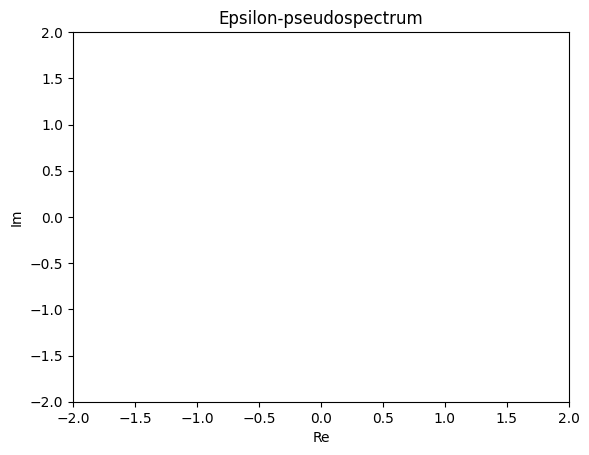

In [113]:
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

def pseudospectrum(C, epsilons=[0.1, 0.5, 1.0], grid_size=100):
    """
    Plot epsilon-pseudospectrum of matrix C.
    
    Edge cases:
        - Singular/non-square matrices: raises ValueError
        - Multiple epsilon values supported
    """
    if C.shape[0] != C.shape[1]:
        raise ValueError("Matrix must be square")
    
    x = np.linspace(-2, 2, grid_size)
    y = np.linspace(-2, 2, grid_size)
    X, Y = np.meshgrid(x, y)
    
    for eps in epsilons:
        Z = np.zeros_like(X)
        for i in range(grid_size):
            for j in range(grid_size):
                z = X[i,j] + 1j*Y[i,j]
                Z[i,j] = 1 / np.linalg.norm(C - z*np.eye(C.shape[0]))
        plt.contour(X, Y, Z, levels=[1/eps], colors='r')
    
    plt.title('Epsilon-pseudospectrum')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.show()

# Example usage
C = np.array([[1,2],[3,4]])
pseudospectrum(C)


# B5. Lyapunov Equation

In [116]:
from scipy.linalg import solve_lyapunov

def solve_lyapunov_equation(C, Q):
    """
    Solve Lyapunov equation: C*X + X*C^T = -Q
    Edge cases:
        - Non-square matrices: raises ValueError
        - Singular matrices handled by scipy.linalg
    """
    if C.shape[0] != C.shape[1] or Q.shape[0] != Q.shape[1]:
        raise ValueError("C and Q must be square matrices")
    
    X = solve_lyapunov(C, -Q)
    return X

# Example usage
C = np.array([[1,2],[3,4]])
Q = np.eye(2)
X = solve_lyapunov_equation(C, Q)
print("Solution X:\n", X)
print("Check C*X + X*C^T + Q:\n", C@X + X@C.T + Q)


Solution X:
 [[ 0.9 -0.7]
 [-0.7  0.4]]
Check C*X + X*C^T + Q:
 [[-6.66133815e-16 -1.11022302e-16]
 [-1.11022302e-16 -1.33226763e-15]]
